In [ ]:
# Initially download all the packages required...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PDS HW-3/clean_diabetes.csv')

In [ ]:
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0
764,764,2,122,70,27,0,36.8,0.340,27,0
765,765,5,121,72,23,112,26.2,0.245,30,0
766,766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Let's say randomly select a seed value and assign to it..
np.random.seed(42)

In [ ]:
# test for some 25 random rows
samp_length = 25
sa = df.sample(sample_size)

In [ ]:
# Now find out the average and highest value of glucose of random 25 samples.

avg_glucose = sa['Glucose'].mean()
high_avg_glucose = sa['Glucose'].max()

# # Now find out the average and highest value of glucose of complete population provided.

avg_glucose_pop = df['Glucose'].mean()
avg_glucose_hi = df['Glucose'].max()




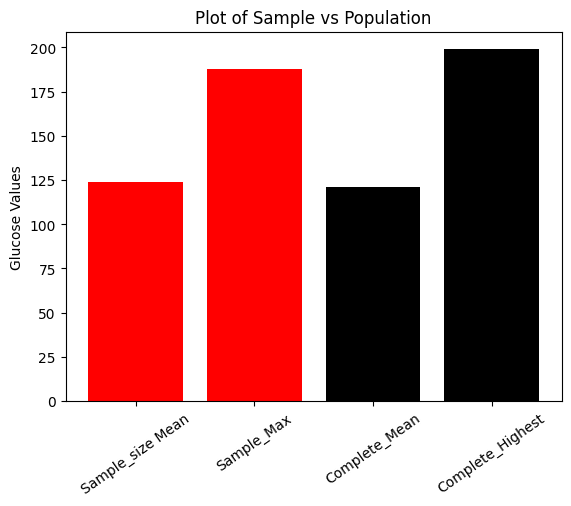

In [ ]:
# Now create a bar chart for easy visualization.
labels = ['Sample_size Mean', 'Sample_Max', 'Complete_Mean', 'Complete_Highest']
values = [avg_glucose, high_avg_glucose, avg_glucose_pop, avg_glucose_hi]

# Now let us visualize the above result...

plt.bar(labels, values, color=['red', 'red', 'black', 'black'])
plt.ylabel('Glucose Values')
plt.title('Plot of Sample vs Population')
plt.xticks(rotation=35)

plt.show()


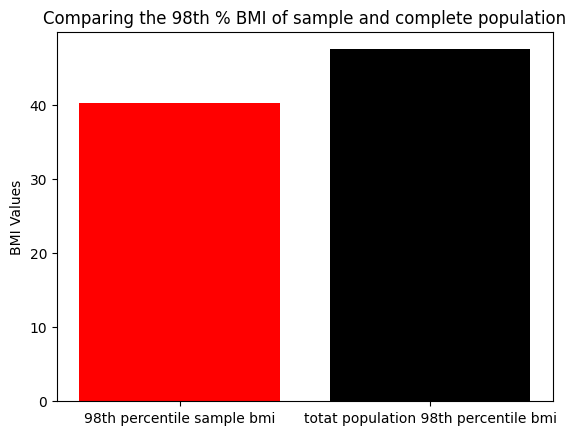

In [ ]:
# b) Here we are going to find out the 98th percentile of the BMI

# Calculate the 98th percentile of BMI for the sample
sam_98_bmi = np.percentile(sample['BMI'], 98)

# Calculate the 98th percentile of BMI for the population
tot_98_bmi = np.percentile(df['BMI'], 98)

# visualize a bar chart for some random 25 samples vs total values
labels = [ '98th percentile sample bmi', 'totat population 98th percentile bmi']
values = [sam_98_bmi, tot_98_bmi]

plt.bar(labels, values, color=['red', 'black'])
plt.ylabel('BMI Values')
plt.title('Comparing the 98th % BMI of sample and complete population')
plt.show()

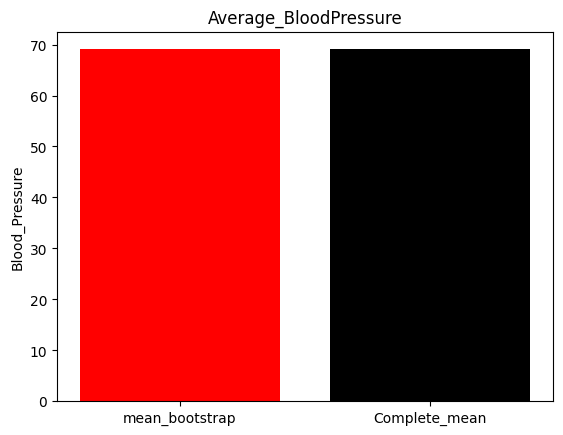

In [14]:


# Number of bootstrap samples and sample size
total_samples = 500
sample_size_per_unit = 150

# Assigning some random variable for bootstrap
bootstrap = np.zeros((total_samples, 3))

# Do Bootstrap_Sampling
for i in range(total_samples):
    sample_data = df['BloodPressure'].sample(n=sample_size_per_unit, replace=True)
    bootstrap[i, 0] = sample_data.mean()
    bootstrap[i, 1] = sample_data.std()
    bootstrap[i, 2] = np.percentile(sample_data, 90)

# Calculating bloodpressure for complete population
total_data_bp_mean = df['BloodPressure'].mean()
total_data_bp_std = df['BloodPressure'].std()
total_data_bp_percentile = np.percentile(df['BloodPressure'], 90)

# Visualizing the same for better understanding.
plt.bar(['mean_bootstrap', 'Complete_mean'], [bootstrap[:, 0].mean(), total_data_bp_mean], color=['red', 'black'])
plt.title('Average_BloodPressure')
plt.ylabel('Blood_Pressure')
plt.show()



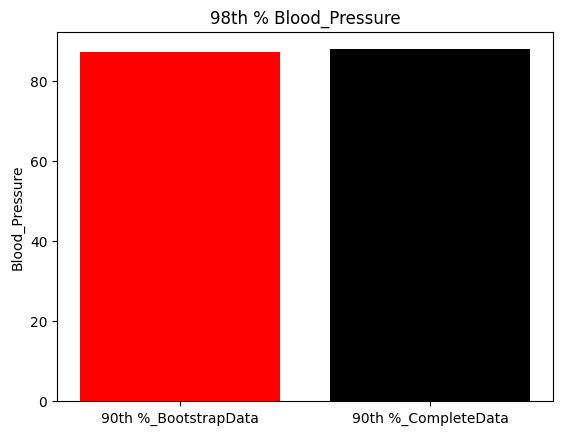

In [17]:



plt.bar(['90th %_BootstrapData', '90th %_CompleteData'],
        [bootstrap[:, 2].mean(), total_data_bp_percentile], color=['red', 'black'])
plt.title('98th % Blood_Pressure')
plt.ylabel('Blood_Pressure')
plt.show()

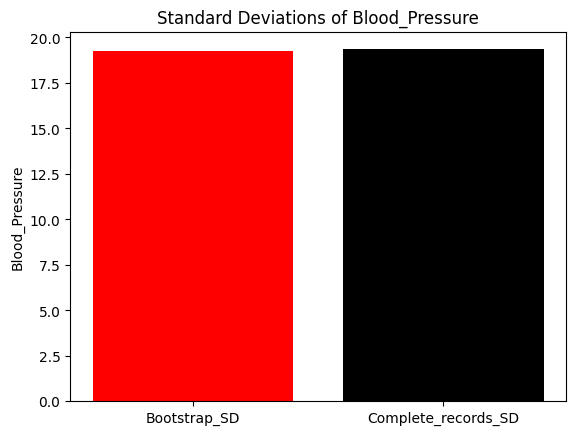

In [16]:
# here we are going to calculate the 150 samples:
plt.bar(['Bootstrap_SD', 'Complete_records_SD'],
        [bootstrap[:, 1].mean(), total_data_bp_std], color=['red', 'black'])
plt.title('Standard Deviations of Blood_Pressure')
plt.ylabel('Blood_Pressure')
plt.show()